## Python Week 9

In [56]:
# This script requires tensorflow 2.0 or higher version
# 
from __future__ import absolute_import, division, print_function
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
import os 

In [5]:
help(os)

Help on module os:

NAME
    os - OS routines for NT or Posix depending on what system we're on.

DESCRIPTION
    This exports:
      - all functions from posix or nt, e.g. unlink, stat, etc.
      - os.path is either posixpath or ntpath
      - os.name is either 'posix' or 'nt'
      - os.curdir is a string representing the current directory (always '.')
      - os.pardir is a string representing the parent directory (always '..')
      - os.sep is the (or a most common) pathname separator ('/' or '\\')
      - os.extsep is the extension separator (always '.')
      - os.altsep is the alternate pathname separator (None or '/')
      - os.pathsep is the component separator used in $PATH etc
      - os.linesep is the line separator in text files ('\r' or '\n' or '\r\n')
      - os.defpath is the default search path for executables
      - os.devnull is the file path of the null device ('/dev/null', etc.)
    
    Programs that import and use 'os' stand a better chance of being
    porta

In [7]:
keras.utils.get_file?

In [8]:
# input data 



data_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

'''
    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)
'''
print(data_path)

C:\Users\Jindogae4\.keras\datasets\auto-mpg.data


In [9]:
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "modelYear", "origin"]

In [10]:
dataset = pd.read_csv(data_path, names = column_names,  na_values = "?", comment = '\t', sep= " ", skipinitialspace=True)

In [157]:
dataset = dataset.dropna()
datasetx = dataset.iloc[:,1:]
datasetx_norm = (datasetx - datasetx.mean())/datasetx.std()

In [167]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
myscaler = StandardScaler()
myscaler.fit(datasetx)
datasetxs = myscaler.transform(datasetx)
np.std(datasetxs, axis=0)

array([1., 1., 1., 1., 1., 1., 1.])

In [103]:
x = np.array(datasetx_norm, dtype='float32')

In [106]:
np.mean(x, axis=0), np.std(x, axis=0)

(array([ 0.000000e+00,  0.000000e+00, -9.731370e-09,  9.731370e-09,
         9.731370e-09,  0.000000e+00,  1.946274e-08], dtype=float32),
 array([0.99872375, 0.9987237 , 0.9987237 , 0.9987237 , 0.9987237 ,
        0.9987237 , 0.9987237 ], dtype=float32))

In [107]:
y = np.array(dataset.iloc[:,0])

In [108]:
import sklearn
from sklearn.model_selection import train_test_split

In [109]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2)

In [128]:
def model():
    data = Input(shape=(7,))
    x = Dense(16, activation='relu')(data)
    x = Dense(8, activation='relu')(x)
    y = Dense(1)(x)
    return Model(data,y)
    
regression = model()
regression.summary()


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 7)]               0         
_________________________________________________________________
dense_27 (Dense)             (None, 16)                128       
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 9         
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [129]:
regression.compile(loss='mse')

In [137]:
regression.fit(Xtrain, Ytrain, epochs=600, batch_size=64)

Train on 313 samples
Epoch 1/600
313/313 [==============================] - 0s 100us/sample - loss: 6.2417
Epoch 2/600
313/313 [==============================] - 0s 0s/sample - loss: 6.1833
Epoch 3/600
313/313 [==============================] - 0s 0s/sample - loss: 6.1366
Epoch 4/600
313/313 [==============================] - 0s 50us/sample - loss: 6.1394
Epoch 5/600
313/313 [==============================] - 0s 50us/sample - loss: 6.1907
Epoch 6/600
313/313 [==============================] - 0s 50us/sample - loss: 6.1941
Epoch 7/600
313/313 [==============================] - 0s 50us/sample - loss: 6.1712
Epoch 8/600
313/313 [==============================] - 0s 50us/sample - loss: 6.1734
Epoch 9/600
313/313 [==============================] - 0s 50us/sample - loss: 6.1385
Epoch 10/600
313/313 [==============================] - 0s 67us/sample - loss: 6.1240
Epoch 11/600
313/313 [==============================] - 0s 50us/sample - loss: 6.1695
Epoch 12/600
313/313 [=======================

313/313 [==============================] - 0s 0s/sample - loss: 5.8591
Epoch 192/600
313/313 [==============================] - 0s 0s/sample - loss: 5.7783
Epoch 193/600
313/313 [==============================] - 0s 50us/sample - loss: 5.8081
Epoch 194/600
313/313 [==============================] - 0s 0s/sample - loss: 5.8109
Epoch 195/600
313/313 [==============================] - 0s 0s/sample - loss: 5.8050
Epoch 196/600
313/313 [==============================] - 0s 50us/sample - loss: 5.8323
Epoch 197/600
313/313 [==============================] - 0s 0s/sample - loss: 5.8302
Epoch 198/600
313/313 [==============================] - 0s 70us/sample - loss: 5.8549
Epoch 199/600
313/313 [==============================] - 0s 0s/sample - loss: 5.7722
Epoch 200/600
313/313 [==============================] - 0s 57us/sample - loss: 5.8032
Epoch 201/600
313/313 [==============================] - 0s 0s/sample - loss: 5.7924
Epoch 202/600
313/313 [==============================] - 0s 50us/sample

313/313 [==============================] - 0s 50us/sample - loss: 5.6464
Epoch 287/600
313/313 [==============================] - 0s 50us/sample - loss: 5.6673
Epoch 288/600
313/313 [==============================] - 0s 77us/sample - loss: 5.6263
Epoch 289/600
313/313 [==============================] - 0s 47us/sample - loss: 5.6333
Epoch 290/600
313/313 [==============================] - 0s 0s/sample - loss: 5.6573
Epoch 291/600
313/313 [==============================] - 0s 3us/sample - loss: 5.6171
Epoch 292/600
313/313 [==============================] - 0s 50us/sample - loss: 5.6587
Epoch 293/600
313/313 [==============================] - 0s 50us/sample - loss: 5.6423
Epoch 294/600
313/313 [==============================] - 0s 50us/sample - loss: 5.6322
Epoch 295/600
313/313 [==============================] - 0s 50us/sample - loss: 5.6104
Epoch 296/600
313/313 [==============================] - 0s 50us/sample - loss: 5.6083
Epoch 297/600
313/313 [==============================] - 0s 

313/313 [==============================] - 0s 50us/sample - loss: 5.4294
Epoch 475/600
313/313 [==============================] - 0s 50us/sample - loss: 5.4513
Epoch 476/600
313/313 [==============================] - 0s 50us/sample - loss: 5.4772
Epoch 477/600
313/313 [==============================] - 0s 50us/sample - loss: 5.4379
Epoch 478/600
313/313 [==============================] - 0s 20us/sample - loss: 5.4133
Epoch 479/600
313/313 [==============================] - 0s 50us/sample - loss: 5.4172
Epoch 480/600
313/313 [==============================] - 0s 44us/sample - loss: 5.4133
Epoch 481/600
313/313 [==============================] - 0s 26us/sample - loss: 5.4210
Epoch 482/600
313/313 [==============================] - 0s 37us/sample - loss: 5.4856
Epoch 483/600
313/313 [==============================] - 0s 16us/sample - loss: 5.4675
Epoch 484/600
313/313 [==============================] - 0s 0s/sample - loss: 5.4011
Epoch 485/600
313/313 [==============================] - 0s

In [138]:
regression.evaluate(Xtest, Ytest)

79/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

9.04138221016413

In [139]:
Ypred = regression.predict(Xtest)

In [140]:
import matplotlib.pyplot as plt

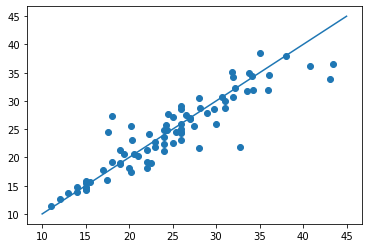

In [168]:
plt.scatter(Ytest, Ypred)
plt.plot([10, 45], [10, 45])

In [169]:
import torch